In [2]:
# to handle datasets
import numpy as np
import os
import pandas as pd

# for plotting
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# for feature scaling
from sklearn.preprocessing import MinMaxScaler

# to divide train and test set
from sklearn.model_selection import train_test_split

# to build the models
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# for evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from math import sqrt

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
    

In [2]:
# Setting the seed for stable operation
np.random.seed(42)

# To plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# location to save the files
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    try:
        plt.savefig(path, format=fig_extension, dpi=resolution)
    except:
        plt.savefig(fig_id + "." + fig_extension, format=fig_extension, dpi=resolution)


In [1]:
data = pd.read_csv('/Concrete_Data_Yeh.csv')                   

data.head(10)

NameError: name 'pd' is not defined

In [8]:
#Rename data if required
data.rename(columns={'cement': 'Cement', 'slag': 'Slag', 'flyash':'Fly Ash', 'water': 'Water', 'superplasticizer':'Super Plasticizer',
'coarseaggregate':'Coarse Aggregate', 'fineaggregate':'Fine Aggregate', 'age': 'Age', 'csMPa':'Compressive Strength(MPa)'
}, 
                 inplace=True)

In [9]:
data.head()

,Cement,Slag,Fly Ash,Water,Super Plasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength(MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Data Observation

In [10]:
data.describe()

,Cement,Slag,Fly Ash,Water,Super Plasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength(MPa)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cement                     1030 non-null   float64
 1   Slag                       1030 non-null   float64
 2   Fly Ash                    1030 non-null   float64
 3   Water                      1030 non-null   float64
 4   Super Plasticizer          1030 non-null   float64
 5   Coarse Aggregate           1030 non-null   float64
 6   Fine Aggregate             1030 non-null   float64
 7   Age                        1030 non-null   int64  
 8   Compressive Strength(MPa)  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [12]:
data.shape

(1030, 9)

## Data Visualization

Saving figure attribute_histogram_plots


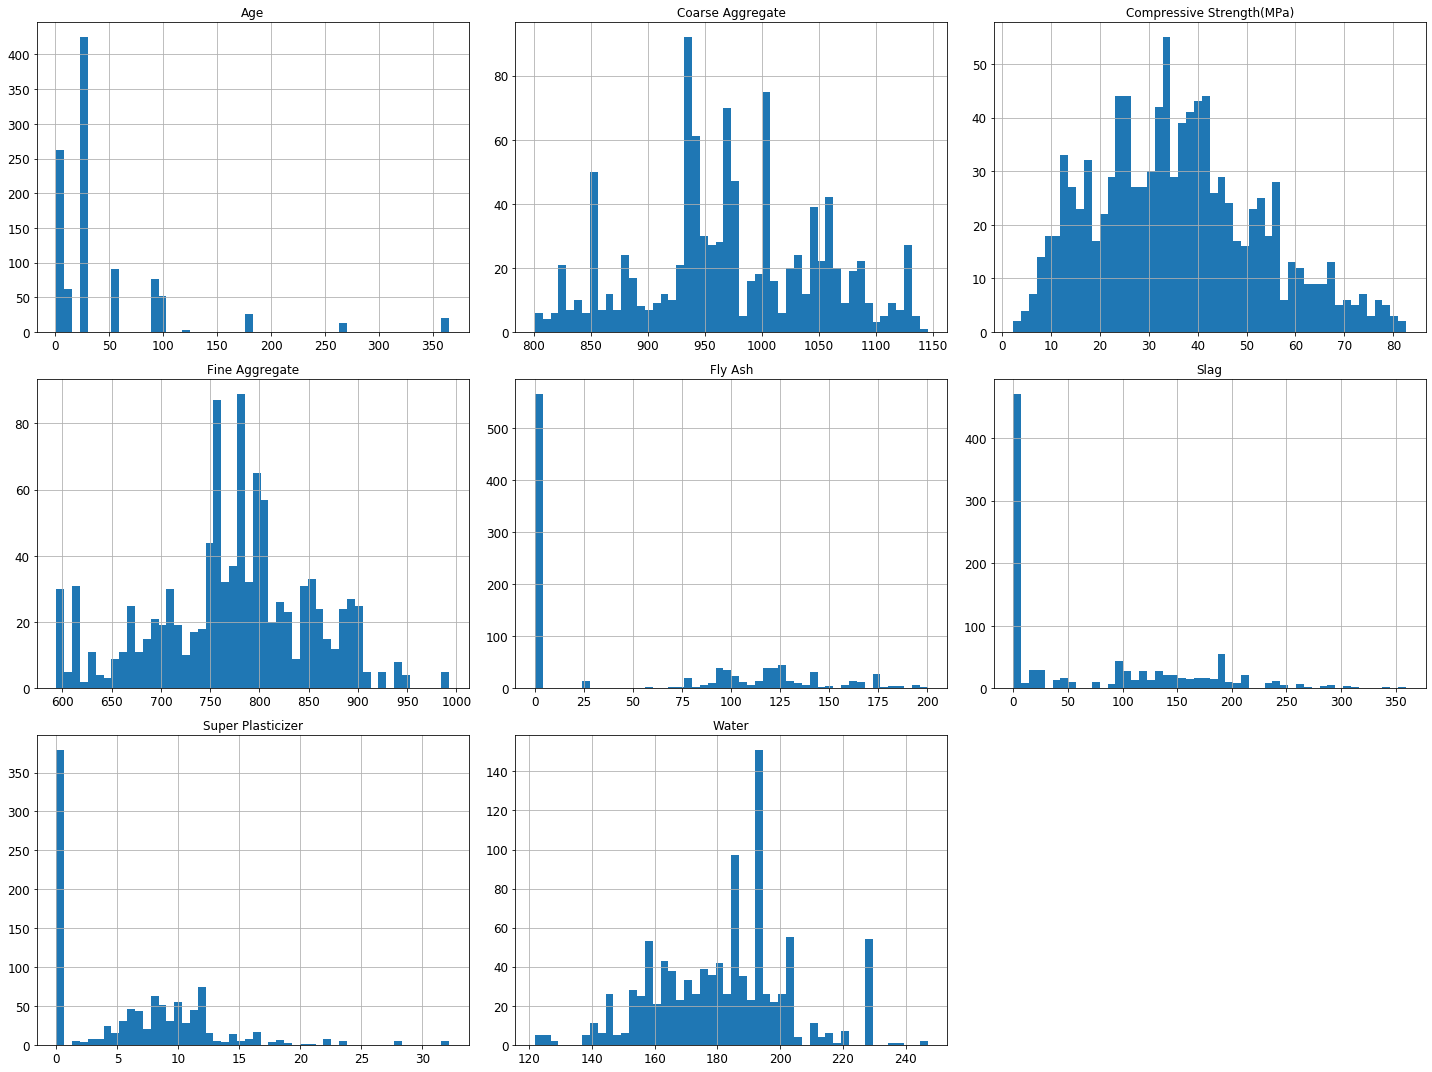

In [13]:
# Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt

try:
    # We select all rows and all columns after the 6th
    data.iloc[:,1:].hist(bins=50, figsize=(20,15))
    save_fig("attribute_histogram_plots")
    plt.show()
except AttributeError:
    pass


In [14]:
data.columns

Index(['Cement', 'Slag', 'Fly Ash', 'Water', 'Super Plasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Compressive Strength(MPa)'],
      dtype='object')

# Numerical Variables Processing

In [15]:
# prepare a list of the numerical variables, which contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1 and X_train[var].dtypes!='O']

# print the name of the variable and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3),  ' % missing values')

In [16]:
# replace the missing values
for var in vars_with_na:
    
    # calculate the mode
    mode_val = data[var].mode()[0]
    
    # train
    data[var+'_na'] = np.where(data[var].isnull(), 1, 0)
    data[var].fillna(mode_val, inplace=True)
    

# check that we have no more missing values in the engineered variables
data[vars_with_na].isnull().sum()

Series([], dtype: float64)

### Check the distribution using the boxplot

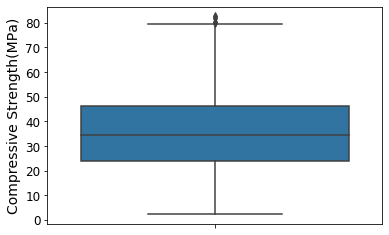

In [17]:
## Use a boxplot to check for extreme values (outliers)


sns.boxplot( y=(data["Compressive Strength(MPa)"]) )

### Check the skew 

In [19]:
data["Compressive Strength(MPa)"].skew()

0.416977288410718

In [20]:
data["Compressive Strength(MPa)"].kurtosis()

-0.3137248604469969

In [22]:
## Filter the outliers by only taking data from the 99.5% percentile and exclude the bottom .25% and top 0.25% of values
## This function returns the highest value of the 99.5% percentile that is still quite high when compared to the mean and median
print(data["Compressive Strength(MPa)"].quantile(0.995))
print(data["Compressive Strength(MPa)"].mean())
print(data["Compressive Strength(MPa)"].median())

79.3
35.81796116504851
34.445


### Remove outliers if necessary

In [23]:
# Now we remove all prices over the 99.5% percentile 
data = data[data["Compressive Strength(MPa)"]<data["Compressive Strength(MPa)"].quantile(0.995)].reset_index(drop=True)

In [25]:
data["Compressive Strength(MPa)"].skew()

0.34973426771653704

In [27]:
data["Compressive Strength(MPa)"].kurtosis()

-0.43407391452210176

## EDA Exploratory Data Analysis

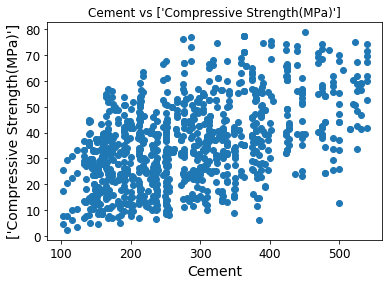

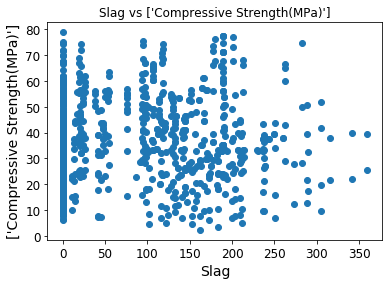

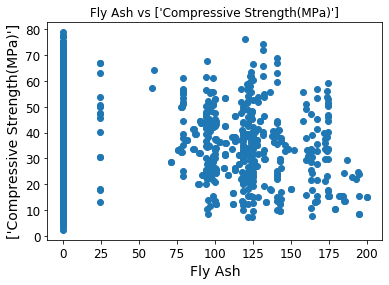

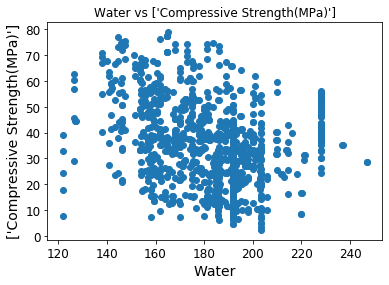

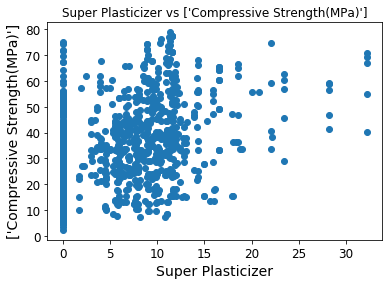

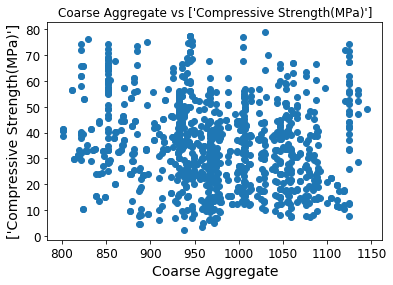

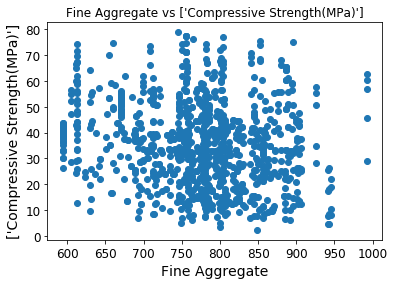

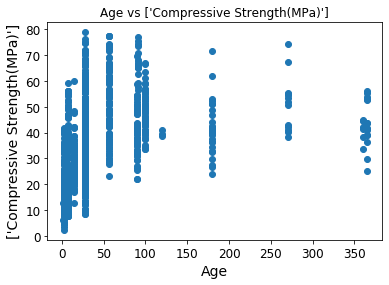

In [39]:
y_col = ["Compressive Strength(MPa)"]
x_columns = ['Cement',
'Slag',
'Fly Ash',
'Water',
'Super Plasticizer',
'Coarse Aggregate',
'Fine Aggregate',
'Age'
]




for x_col in x_columns:

    figure = plt.figure
    axes = plt.gca()
    axes.scatter(data[x_col], data[y_col])
    axes.set_xlabel(x_col)
    axes.set_ylabel(y_col)
    axes.set_title("{} vs {}".format(x_col, y_col))
    #save_fig("Scatter_Plots")

   
    plt.show()

In [32]:
#Select the columns that need to be in the dataframe
#incl = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee",] ] 

#df = df[incl]

In [37]:
data.corr()




,Cement,Slag,Fly Ash,Water,Super Plasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength(MPa)
Cement,1.000000,-0.285181,-0.393855,-0.073894,0.086703,-0.110985,-0.219562,0.080090,0.494182
Slag,-0.285181,1.000000,-0.318818,0.117631,0.030078,-0.284258,-0.280240,-0.050068,0.112585
Fly Ash,-0.393855,-0.318818,1.000000,-0.266829,0.389584,-0.009756,0.075906,-0.152273,-0.089021
Water,-0.073894,0.117631,-0.266829,1.000000,-0.656430,-0.181961,-0.457139,0.282542,-0.276361
Super Plasticizer,0.086703,0.030078,0.389584,-0.656430,1.000000,-0.265073,0.227287,-0.199847,0.357137
Coarse Aggregate,-0.110985,-0.284258,-0.009756,-0.181961,-0.265073,1.000000,-0.178606,-0.000852,-0.171864
Fine Aggregate,-0.219562,-0.280240,0.075906,-0.457139,0.227287,-0.178606,1.000000,-0.155984,-0.161384
Age,0.080090,-0.050068,-0.152273,0.282542,-0.199847,-0.000852,-0.155984,1.000000,0.331093
Compressive Strength(MPa),0.494182,0.112585,-0.089021,-0.276361,0.357137,-0.171864,-0.161384,0.331093,1.000000


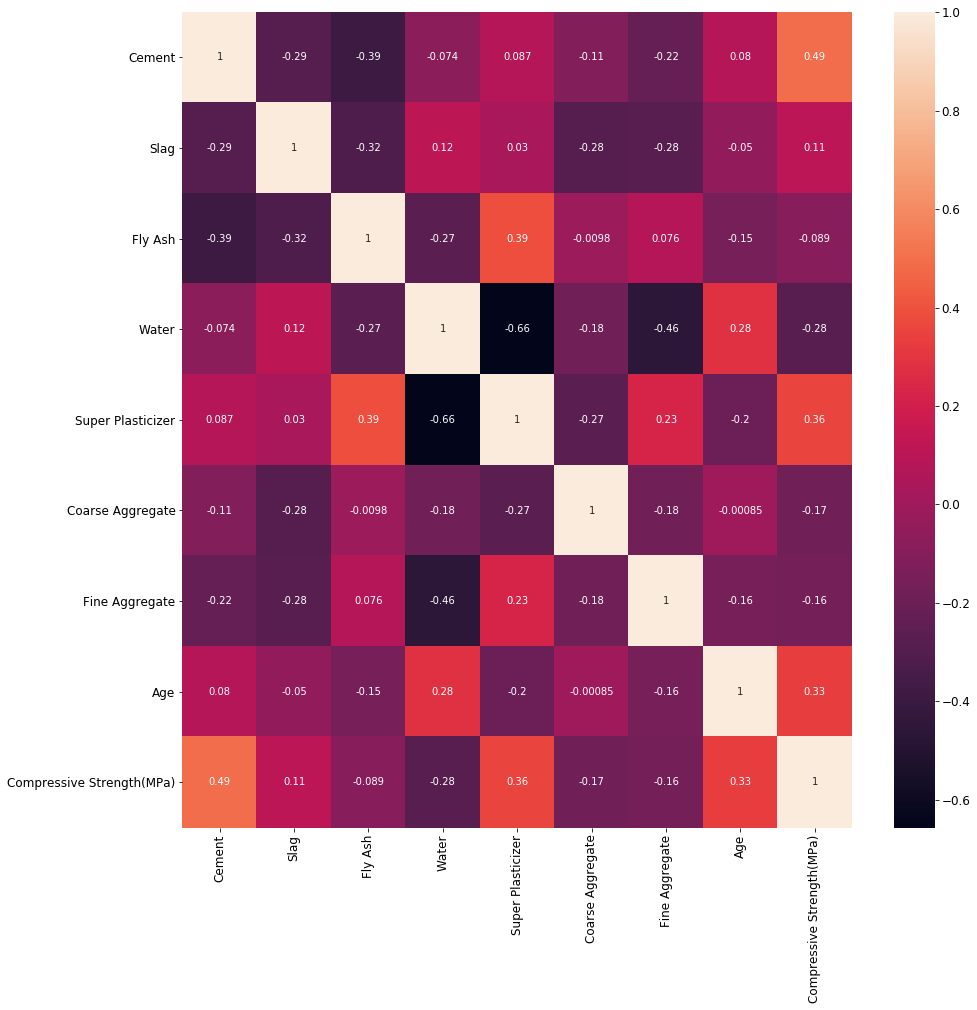

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True)

In [40]:
Label='Compressive Strength(MPa)'

X_train, X_test, y_train, y_test = train_test_split(data, data[Label],
                                                    test_size=0.1,
                                                    random_state=0) # we are setting the seed here


In [41]:
#drop the label from X_train and X_test

X_train.drop([Label], axis=1, inplace=True)
X_test.drop([Label], axis=1, inplace=True)


C:\Users\pjjay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
X_train.shape, X_test.shape

((918, 8), (103, 8))

In [43]:
X_train.head()

,Cement,Slag,Fly Ash,Water,Super Plasticizer,Coarse Aggregate,Fine Aggregate,Age
801,310.0,0.0,0.0,192.0,0.0,970.0,850.0,7
142,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56
1014,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28
253,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,28
956,330.5,169.6,0.0,194.9,8.1,811.0,802.3,28


In [44]:
X_test.head()


,Cement,Slag,Fly Ash,Water,Super Plasticizer,Coarse Aggregate,Fine Aggregate,Age
1008,313.8,0.0,112.6,169.9,10.1,925.3,782.9,28
27,427.5,47.5,0.0,228.0,0.0,932.0,594.0,28
77,388.6,97.1,0.0,157.9,12.1,852.1,925.7,3
279,181.4,0.0,167.0,169.6,7.6,1055.6,777.8,56
319,252.3,0.0,98.8,146.3,14.2,987.8,889.0,56


In [45]:
y_train.head()

801     14.99
142     60.20
1014    39.46
253     37.40
956     56.62
Name: Compressive Strength(MPa), dtype: float64

In [46]:
y_test.head()

1008    38.46
27      37.43
77      28.10
279     35.57
319     55.83
Name: Compressive Strength(MPa), dtype: float64

In [48]:
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [49]:
# this command let's us visualise those features that were kept.
# Kept features have a True indicator
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [50]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 8
selected features: 8
features with coefficients shrank to zero: 0


In [51]:
# print the selected features
selected_feat

Index(['Cement', 'Slag', 'Fly Ash', 'Water', 'Super Plasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [52]:
# this is an alternative way of identifying the selected features 
# based on the non-zero regularisation coefficients:
selected_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feats

Index(['Cement', 'Slag', 'Fly Ash', 'Water', 'Super Plasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

Choosing the correct algorithm

In [54]:
# Import all the algorithms we want to test
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression


In [55]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

In [56]:
 #Prepare an array with all the algorithms
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge Regression', Ridge()))
models.append(('RidgeCV', RidgeCV()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('MultiTaskElasticNet', MultiTaskElasticNet()))
models.append(('LassoLars', LassoLars()))
models.append(('BayesianRidge', BayesianRidge()))
models.append(('ARDRegression',  ARDRegression()))

In [57]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []

cross_values_dict={}

#create dataframe
column_names = ["Algorithm", "Score", "Mean", "Std"]

#cross_values_df = pd.DataFrame({'Algorithm': [], 'Score': [], 'Mean': [],'Std':[]})
cross_values_df = pd.DataFrame(columns=column_names)

X = X_train
Y = y_train

In [58]:
cross_values_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Algorithm  0 non-null      object
 1   Score      0 non-null      object
 2   Mean       0 non-null      object
 3   Std        0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


In [59]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #scoring = 'r2'
    
    for score in ["r2", "neg_mean_absolute_error", "neg_mean_squared_error"]:
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring= score)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %s: %f (%f)"  %(
        name, score, cv_results.mean(), cv_results.std() )
        score_mean=cv_results.mean()
        score_std=cv_results.std()
        
        cross_values_dict.update({'Algorithm':name, 'Score':score, 'Mean': score_mean, 'Std':score_std  })
        cross_values_df = cross_values_df.append(cross_values_dict, ignore_index=True)
        print(msg)
    
    

    
    
   

C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Linear Regression: r2: 0.597955 (0.054469)
Linear Regression: neg_mean_absolute_error: -8.319165 (0.525560)
Linear Regression: neg_mean_squared_error: -108.796549 (12.423404)


C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Ridge Regression: r2: 0.597955 (0.054469)
Ridge Regression: neg_mean_absolute_error: -8.319161 (0.525563)
Ridge Regression: neg_mean_squared_error: -108.796494 (12.423445)
RidgeCV: r2: 0.597957 (0.054467)


C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RidgeCV: neg_mean_absolute_error: -8.319128 (0.525592)
RidgeCV: neg_mean_squared_error: -108.795998 (12.423813)
Lasso: r2: 0.597811 (0.053734)
Lasso: neg_mean_absolute_error: -8.321940 (0.534364)

C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



Lasso: neg_mean_squared_error: -108.863419 (12.468359)
ElasticNet: r2: 0.598004 (0.054041)
ElasticNet: neg_mean_absolute_error: -8.318953 (0.531011)
ElasticNet: neg_mean_squared_error: -108.800014 (12.457058)
MultiTaskElasticNet: r2: nan (nan)
MultiTaskElasticNet: neg_mean_absolute_error: nan (nan)


C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: For mono-task outputs, use ElasticNet

  FitFailedWarning)
C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: For mono-task outputs, use ElasticNet

  FitFailedWarning)
C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on th

MultiTaskElasticNet: neg_mean_squared_error: nan (nan)
LassoLars: r2: -0.007821 (0.010743)
LassoLars: neg_mean_absolute_error: -13.487976 (0.657893)
LassoLars: neg_mean_squared_error: -273.964442 (18.191646)
BayesianRidge: r2: 0.598342 (0.053791)
BayesianRidge: neg_mean_absolute_error: -8.308350 (0.543500)

C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



BayesianRidge: neg_mean_squared_error: -108.726999 (12.594840)


C:\Users\pjjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ARDRegression: r2: 0.598872 (0.054861)
ARDRegression: neg_mean_absolute_error: -8.354217 (0.538400)
ARDRegression: neg_mean_squared_error: -108.561536 (12.608591)


In [60]:
cross_values_df.head(20)




,Algorithm,Score,Mean,Std
0,Linear Regression,r2,0.597955,0.054469
1,Linear Regression,neg_mean_absolute_error,-8.319165,0.525560
2,Linear Regression,neg_mean_squared_error,-108.796549,12.423404
3,Ridge Regression,r2,0.597955,0.054469
4,Ridge Regression,neg_mean_absolute_error,-8.319161,0.525563
5,Ridge Regression,neg_mean_squared_error,-108.796494,12.423445
6,RidgeCV,r2,0.597957,0.054467
7,RidgeCV,neg_mean_absolute_error,-8.319128,0.525592
8,RidgeCV,neg_mean_squared_error,-108.795998,12.423813
9,Lasso,r2,0.597811,0.053734


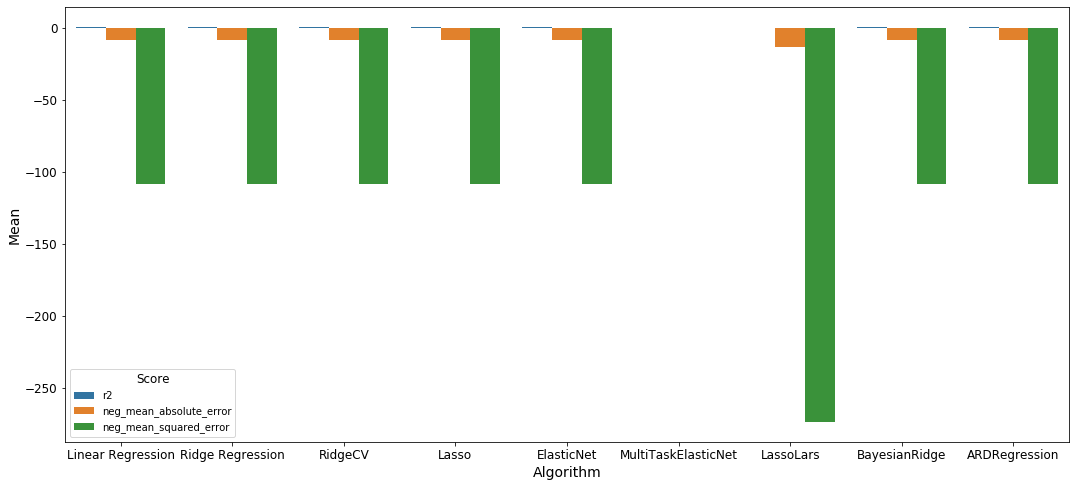

In [62]:

# Bar Plot for mean values

# Enlarge the plot
plt.figure(figsize=(18,8))
sns.barplot(x = cross_values_df.Algorithm, y = cross_values_df.Mean, hue = cross_values_df.Score)

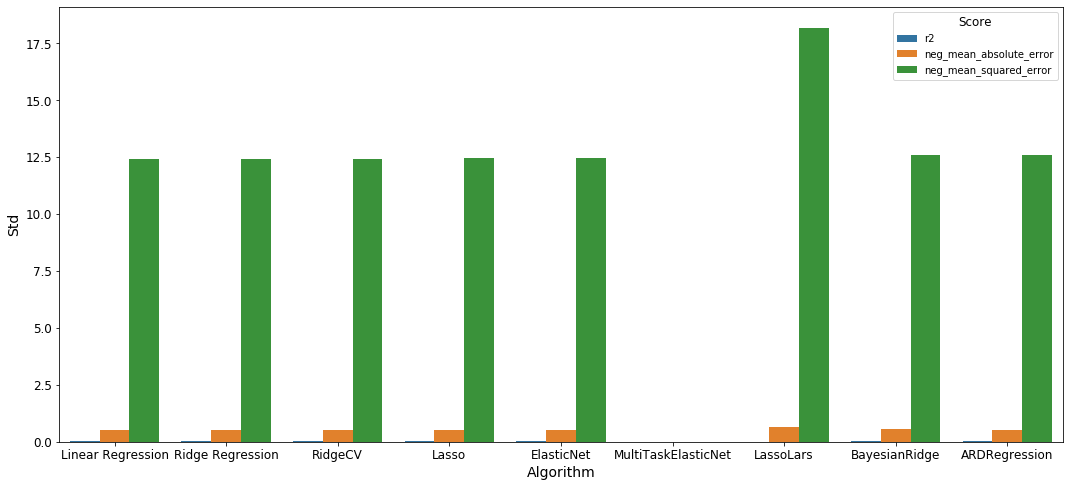

In [63]:
# Bar Plot for Standard Deviation

# Enlarge the plot
plt.figure(figsize=(18,8))
sns.barplot(x = cross_values_df.Algorithm, y = cross_values_df.Std, hue = cross_values_df.Score)

In [67]:
cross_values_df

,Algorithm,Score,Mean,Std
0,Linear Regression,r2,0.597955,0.054469
1,Linear Regression,neg_mean_absolute_error,-8.319165,0.525560
2,Linear Regression,neg_mean_squared_error,-108.796549,12.423404
3,Ridge Regression,r2,0.597955,0.054469
4,Ridge Regression,neg_mean_absolute_error,-8.319161,0.525563
5,Ridge Regression,neg_mean_squared_error,-108.796494,12.423445
6,RidgeCV,r2,0.597957,0.054467
7,RidgeCV,neg_mean_absolute_error,-8.319128,0.525592
8,RidgeCV,neg_mean_squared_error,-108.795998,12.423813
9,Lasso,r2,0.597811,0.053734


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

model_LR = LinearRegression()

grid_search = GridSearchCV(
    model_LR, param_grid, cv=10, scoring='r2')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [69]:
# Print the bext score found
grid_search.best_score_

0.5992581330713118

In [75]:
model_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

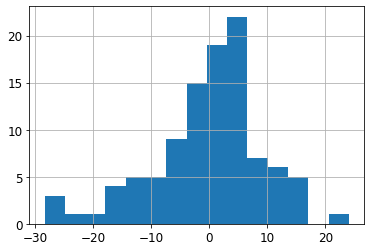

In [74]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - model_LR.predict(X_test)
errors.hist(bins=15)

Text(0.5, 1.0, 'Evaluation of Model Predictions')

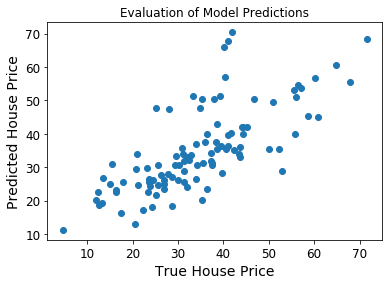

In [76]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, model_LR.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Model Predictions')

In [77]:
# train the model
model_LR = LinearRegression()#Lasso(alpha=0.005, random_state=0) # remember to set the random_state / seed
model_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
# evaluate the model:
# remember that we log transformed the output (SalePrice) in our feature engineering notebook / lecture.

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and the
# root of the mean squared error

pred = model_LR.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print()
pred = model_LR.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print()
print('Median Appliances Power: ', np.exp(y_train).median())

linear train mse: 6.573487585164699e+65
linear train rmse: 8.10770472153784e+32

linear test mse: 1.5747276541527518e+60
linear test rmse: 1.2548815299273282e+30

Median Appliances Power:  636612830986882.6


In [81]:
model_LR.predict([[540.0,
0.0,
0.0,
162.0,
2.5,
1055.0,
676.0,
28
]])

array([53.42955257])

In [80]:
data.head()

,Cement,Slag,Fly Ash,Water,Super Plasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength(MPa)
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


Text(0.5, 1.0, 'Feature Importance')

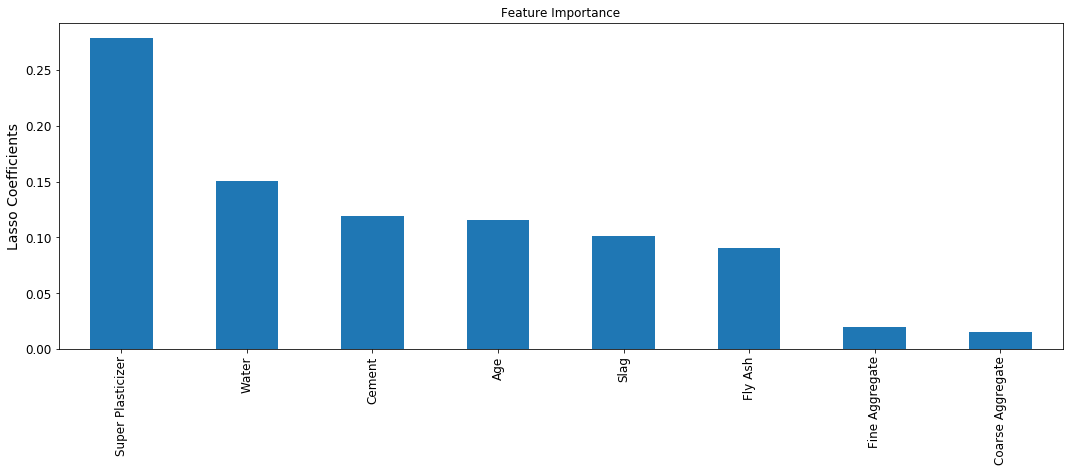

In [84]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(model_LR.coef_.ravel()))
importance.index = selected_feat
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')


In [86]:
import joblib
# save the model to disk
filename = 'concrete_strength_final_model.sav'
joblib.dump(model_LR, filename)

['concrete_strength_final_model.sav']